In [52]:
import sqlite3
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [18]:
conn = sqlite3.Connection("crowd.sqlite")

In [19]:
with conn:
    data = conn.execute("select name from sqlite_master where type = 'table'").fetchall()

In [45]:
with conn:
    data = conn.execute("SELECT t.* FROM video_500nm_colloids_40x t").fetchall()

In [47]:
tau = [tau + 1 for tau in range(len(data[0][1:]))]
tau

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79]

In [48]:
dat = {v[0]: v[1:] for v in data}

In [110]:

func = lambda tau, A, tau_q, B: A * (1 - np.exp(-tau/tau_q)) + B

fits = [(q, *curve_fit(func, tau, dat[q], bounds=((-np.inf, 0, -np.inf),
                                                 (np.inf)))[0]) for q in dat.keys()]


In [122]:
Q = np.log([x[0] for x in fits])
TAU_Q = np.log([x[2] for x in fits])
A_Q = np.log([x[1] for x in fits])
B_Q = np.log([x[3] for x in fits])

/Users/jordan/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


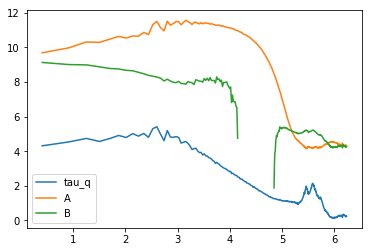

In [126]:
plt.plot(Q, TAU_Q, label="tau_q")
plt.plot(Q, A_Q, label="A")
plt.plot(Q, B_Q, label="B")
plt.legend(loc='lower left')

In [134]:
fits_filtered = list(filter(lambda f: 3.0 <= np.log(f[0]) <= 4.8, fits))
Q_filtered = np.log([x[0] for x in fits_filtered])
TAU_Q_filtered = np.log([x[2] for x in fits_filtered])
A_Q_filtered = np.log([x[1] for x in fits_filtered])
B_Q_filtered = np.log([x[3] for x in fits_filtered])

/Users/jordan/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


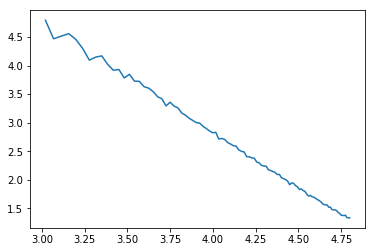

In [135]:
plt.plot(Q_filtered, TAU_Q_filtered)


In [136]:
linear_func = lambda x, m, c: m*x + c
fit, err = curve_fit(linear_func, Q_filtered, TAU_Q_filtered)

In [137]:
m_err = np.sqrt(err[0][0])
c_err = np.sqrt(err[1][1])
m, c = fit

In [138]:
m_err, c_err, m, c

(0.007322279882905342,
 0.030654971149400474,
 -1.9327263781158242,
 10.560828749751217)

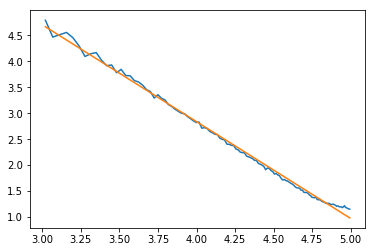

In [133]:
plt.plot(Q_filtered, TAU_Q_filtered)
plt.plot(Q_filtered, m*Q_filtered + c)

In [98]:
D = np.exp(-c)

In [101]:
D

3.325547326809454e-05